In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
hw=pd.read_csv('https://gist.githubusercontent.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb/raw/bf95a2e30fceb9f2ae990eac8379fc7d844a0196/weight-height.csv')

In [4]:
hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
hw.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


(array([  23.,  218.,  926., 1906., 2196., 2167., 1612.,  765.,  163.,
          24.]),
 array([54.26313333, 56.73669423, 59.21025513, 61.68381603, 64.15737693,
        66.63093784, 69.10449874, 71.57805964, 74.05162054, 76.52518144,
        78.99874235]),
 <BarContainer object of 10 artists>)

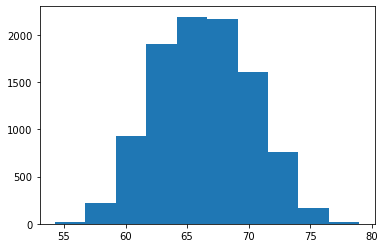

In [6]:
plt.hist(hw.Height)

In [7]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [8]:
stats.shapiro(hw.Height)

C:\anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9960622191429138, pvalue=8.158031071868303e-16)

In [9]:
stats.shapiro(hw.Weight)

ShapiroResult(statistic=0.9862456321716309, pvalue=5.538567140735469e-30)

In [10]:
hw.shape

(10000, 3)

In [11]:
train=hw.iloc[:8000]

In [12]:
test=hw.iloc[8000:]

In [13]:
train.shape

(8000, 3)

In [14]:
test.shape

(2000, 3)

ValueError: 'color' kwarg must be an color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

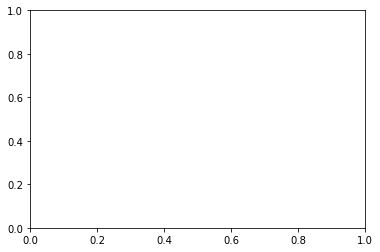

In [27]:
sns.scatterplot(x=hw.Height,y=hw.Weight,data=hw,color={'Height':'yellow','Weight':'green'})


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='Weight'>

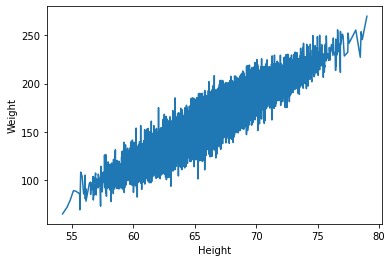

In [21]:
sns.lineplot(hw.Height,hw.Weight)

In [17]:
from scipy.stats import pearsonr


In [18]:
corr, _ = pearsonr(hw.Height,hw.Weight)

In [21]:
corr

0.9247562987409147

In [22]:
_

0.0

In [23]:
import statsmodels.api as sm


In [24]:
train_x=train.Weight

In [ ]:
test_y=train.Height

In [ ]:
train_x=sm.add_constant(train_x)

In [ ]:
train_x

In [ ]:
model=sm.OLS(train_y,train_x).fit()

In [ ]:
model.summary()

In [ ]:
model.params

In [ ]:
test_x=test.Weight

In [ ]:
test_y=test.Height

In [ ]:
test_x=sm.add_constant(test_x)

In [ ]:
test_x

In [ ]:
predict=model.predict(test_x)

In [ ]:
predict

In [ ]:
x=np.array(hw.Weight,hw.Height)
y=np.array(hw.Weight,hw.Height)

In [ ]:
sns.countplot(hw.Height,data=hw)